In [5]:
# Importing packages to visualise
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [6]:
# Reading the dataset 
genome_info = '/Users/aneruthmohanasundaram/Documents/GitHub/Advance-Bioinformatics/Assignment 2/Datasets/dm6.fa'
sequence_info = '/Users/aneruthmohanasundaram/Documents/GitHub/Advance-Bioinformatics/Assignment 2/Datasets/10k_reads.fastq'

In [7]:
# Parsing the file
def readGenome(aFile):
    ''' Funtion to read the fastq file. In our fastq file we have a special character and we need to consider our codes after that. '''
    f = open(aFile)
    aval = ''.join([i.rstrip() for i in f.readlines() if not i[0] == '>'])
    return aval.upper() # Since our characters consist of mixed case letters.

In [8]:
# Count the number of bases present 
def countFrequency(listToPass):
    ''' This functions counts the frequency of each base present in our genome '''
    base_count = {'A':0,'G':0,'C':0,'T':0} # To keep a count number of bases present in our dataset
    for i in listToPass:
        if i in base_count.keys():
            base_count[i] += 1
    return base_count

In [9]:
# Function to read the sequence
def readSequence(seq):
    ''' A function to extract all the sequence and quality score from our dataset '''
    f = open(seq,'r') # Reading the file
    sequence,quality = [],[]
    while True:
        f.readline()
        seq = f.readline().rstrip() # Assigning our sequence to a variable
        f.readline()
        qual = f.readline().rstrip() # Fetching our quality 
        if len(seq) == 0: break # Exit the while loop
        sequence.append(seq) # Appending our sequence to our newly created empty list
        quality.append(qual) # Appending our quality score to newly created empty list
    return sequence,quality # Returns the values in tuple format

In [10]:
# Functions to calculate the quality score
def qulaityScore(astring):
    return ord(astring) - 33 # Ord function gives the ascii values

def fetchQualityScore(alist):
    blist = [qulaityScore(j) for i in list(alist) for j in i] # Consider each character and calculates its quality score
    return blist

In [11]:
# Function to define or perform suffixArray
def suffixArray(s):
    suffixes = [(s[i:], i) for i in range(len(s))]
    suffixes.sort(key=lambda x: x[0])
    return [s[1] for s in suffixes]

In [12]:
genome = readGenome(genome_info)
asd = genome[:1000] # To read the first 1000 genome 
sequence_list = readSequence(sequence_info)[0]
quality_list = readSequence(sequence_info)[1]
qulaity_score = fetchQualityScore(quality_list)

print(f'The first 5 sequence list is {sequence_list[:5]}')
print(f'\nQuality score for first 10 elements is {qulaity_score[:10]}')
print(f'\nNumber of bases present is {countFrequency(asd)}')

The first 5 sequence list is ['TTCACCCTATAATATGGGAGAGAAAATGAGAGGCAA', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG', 'TCTCGCATACGCGATCATATTTCACCCTATAATATG']

Quality score for first 10 elements is [26, 26, 26, 26, 26, 26, 26, 26, 26, 26]

Number of bases present is {'A': 320, 'G': 201, 'C': 199, 'T': 280}


Text(0, 0.5, 'Count for bases')

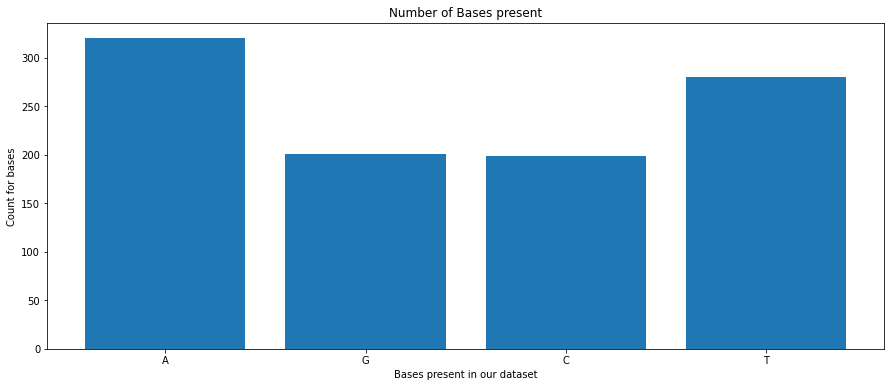

In [13]:
# Visulaising our dataset
keys = countFrequency(asd).keys()
values = countFrequency(asd).values()
plt.figure(figsize=(15,6))
plt.bar(keys,values)
plt.title('Number of Bases present')
plt.xlabel('Bases present in our dataset')
plt.ylabel('Count for bases')

In [14]:
s = 'ATATA'
sorted(range(len(s)), key=lambda i: s[i:])

[4, 2, 0, 3, 1]

In [15]:
suffixes = [(s[i:], i) for i in range(len(s))]
suffixes

[('ATATA', 0), ('TATA', 1), ('ATA', 2), ('TA', 3), ('A', 4)]